<a href="https://colab.research.google.com/github/martinjamouss/ML-Lab/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV.csv").drop('Unnamed: 0', axis=1)


In [5]:
df.head()

,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [6]:

df.columns

Index(['Customer Lifetime Value', 'Income', 'Number of Policies',
       'Total Claim Amount', 'Months Since Last Claim', 'Vehicle Size_Large',
       'Vehicle Size_Medsize', 'Gender_M', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Policy Type_Corporate Auto',
       'Policy Type_Personal Auto', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single'],
      dtype='object')

In [7]:
X = df[['Income', 'Total Claim Amount', 'Months Since Last Claim',
       'Vehicle Size_Large','Gender_M','EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'Policy Type_Corporate Auto', 'Marital Status_Divorced']]
y = df['Customer Lifetime Value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [19]:
mlp = MLPRegressor()
parameters = {'hidden_layer_sizes': [(10,), (10, 30, 50, 70,), (10, 15, 20, 25, 30,)], 
              'activation': ['relu', 'tanh'],  
              'alpha': [0.01, 0.1]}

In [ ]:
# Create an instance of the GridSearchCV class
grid = GridSearchCV(mlp, parameters, cv=5)

# Train the model using grid search
grid.fit(X_train, y_train)

In [ ]:
print('Best Parameters:', grid.best_params_)
print('Best Score:', grid.best_score_)


# 3.) Train a model with the optimal solution from GridSearch

In [20]:
regressor = MLPRegressor(hidden_layer_sizes=(10, 15, 20, 25, 30,), activation='relu', solver='adam', alpha=0.1, max_iter=1000)
regressor.fit(X_train, y_train)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(10, 15, 20, 25, 30), max_iter=1000)

# 4.) What are the in-sample and out of sample MSEs

In [21]:
y_pred_in = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [22]:
out_mse = mean_squared_error(y_test, y_pred)
out_r2 = r2_score(y_test, y_pred)

In [23]:
print(out_mse)
print(out_r2)

46086115.67955021
0.0741697909485659


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [14]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [25]:
model.compile(loss='mse', optimizer = Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 56814104.0000
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 44201276.0000
Epoch 3/100
200/200 [==============================] - 2s 8ms/step - loss: 43692900.0000
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 43804348.0000
Epoch 5/100
200/200 [==============================] - 1s 7ms/step - loss: 43367564.0000
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 43261440.0000
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 43040212.0000
Epoch 8/100
200/200 [==============================] - 1s 4ms/step - loss: 43194488.0000
Epoch 9/100
200/200 [==============================] - 1s 4ms/step - loss: 42869712.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 42839868.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 42909584.0000
Epoch 12/100
200/20

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

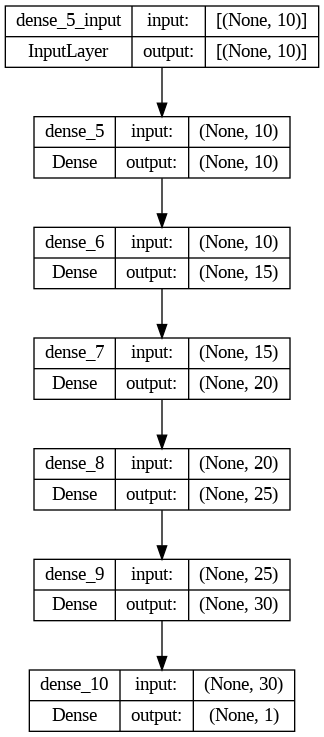

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [27]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "CLV NN Visualisation", filename = "folder/nn_model.gz")

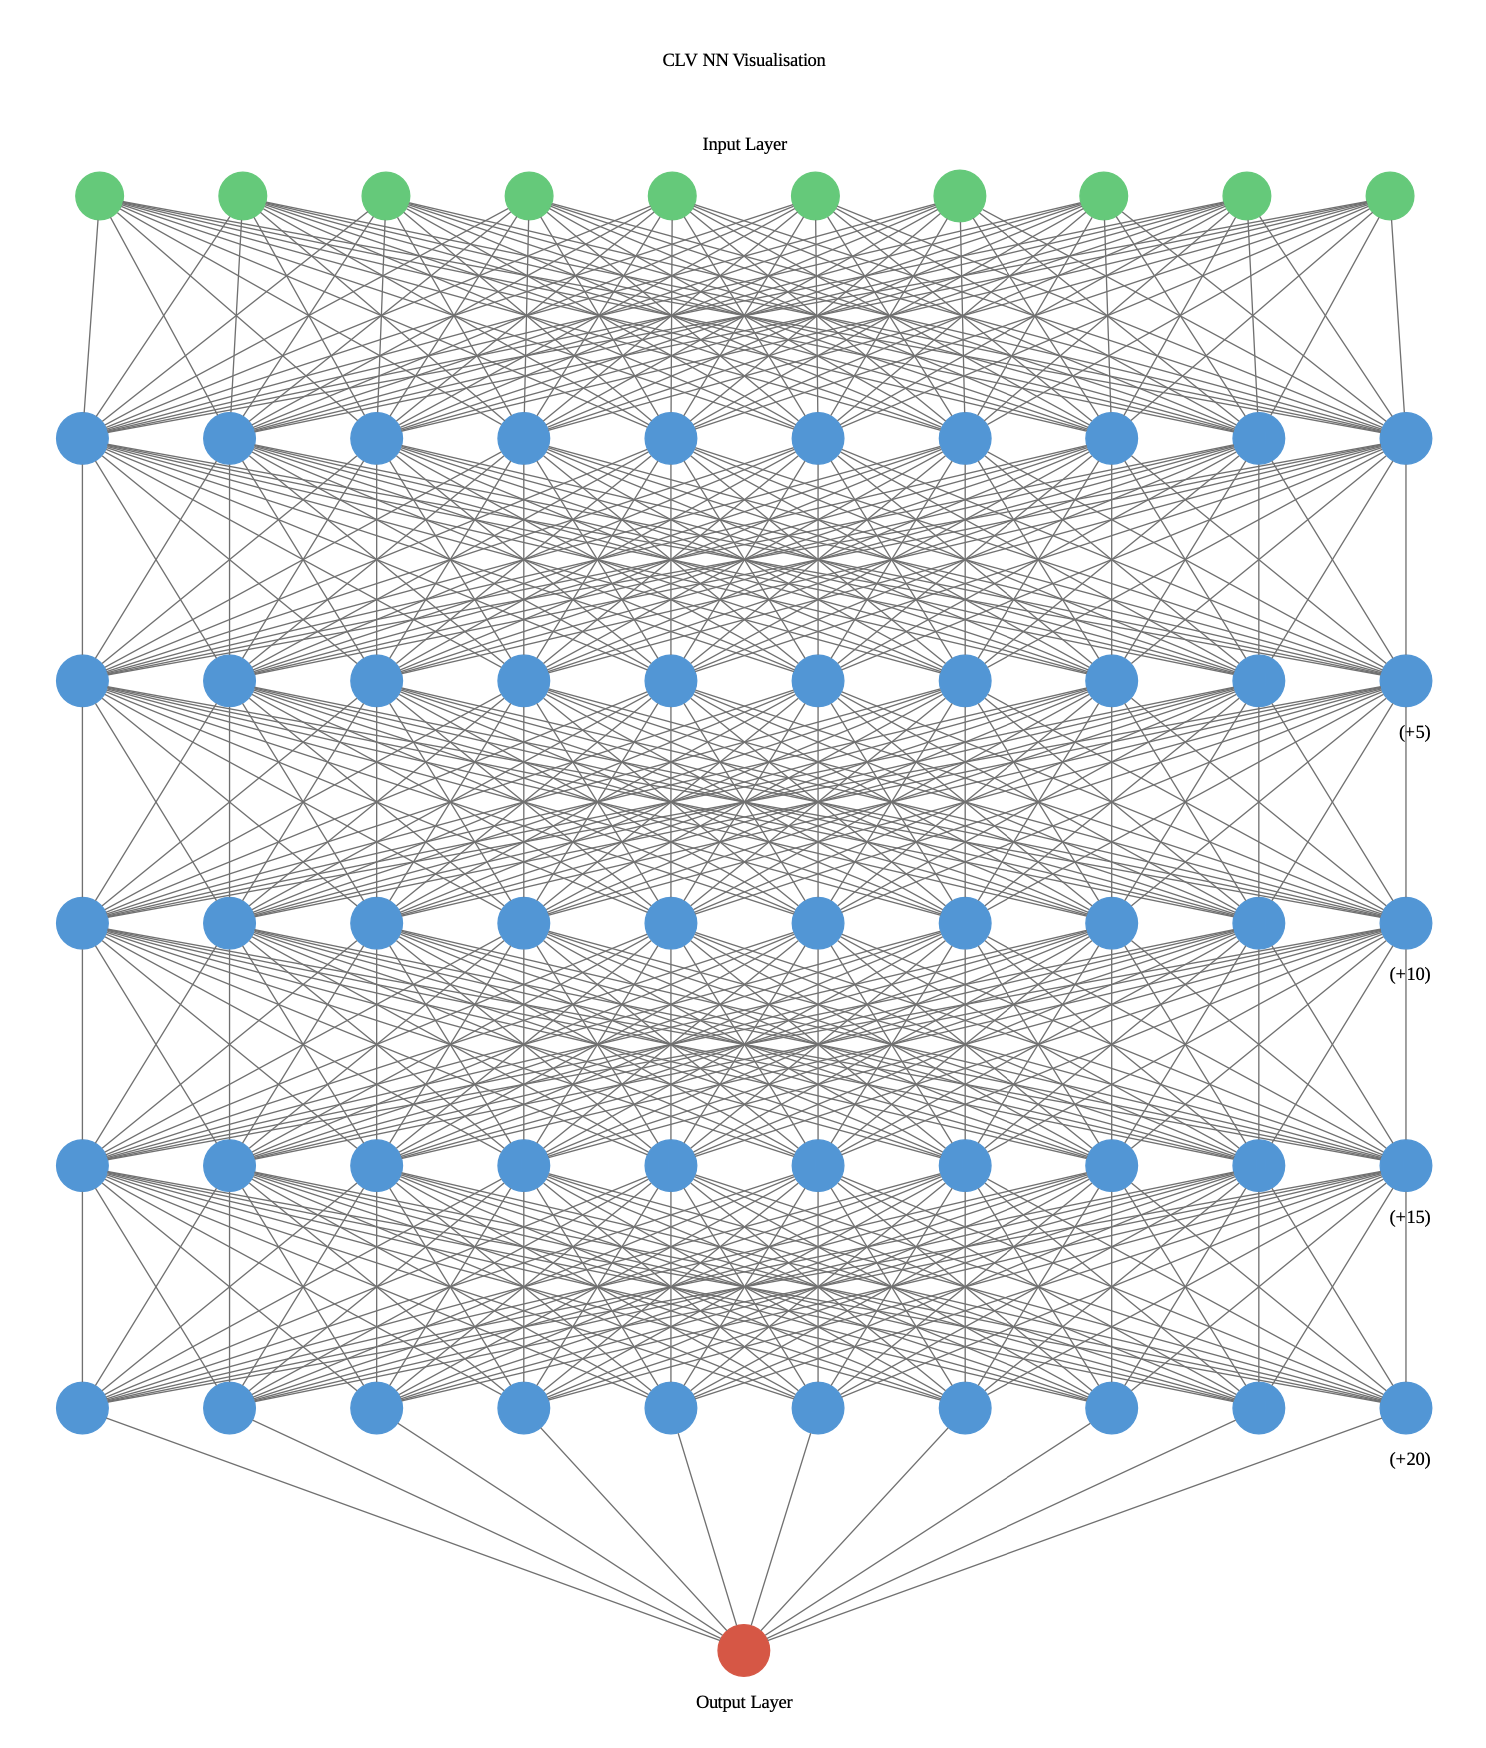